# Bayesian statistics in practice: distributions of sums
Beata Sirowy

Based on: Downey, A. (2021) _Think Bayes_

- We’ll start with a Forward Problem, where we are given the inputs
and compute the distribution of the output. 

- Then we’ll work on Inverse
Problems, where we are given the outputs and we compute the distribution of the
inputs.

## A forward problem

Suppose you roll two dice and add them up. 
- What is the
distribution of the sum? 
We’ll use the following function to create a Pmf that
represents the possible outcomes of a die:

In [37]:
import numpy as np
from empiricaldist import Pmf

def make_die(sides):
    outcomes = np.arange(1, sides+1)
    die = Pmf(1/sides, outcomes)
    return die

In [38]:
die = make_die(6)
die

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


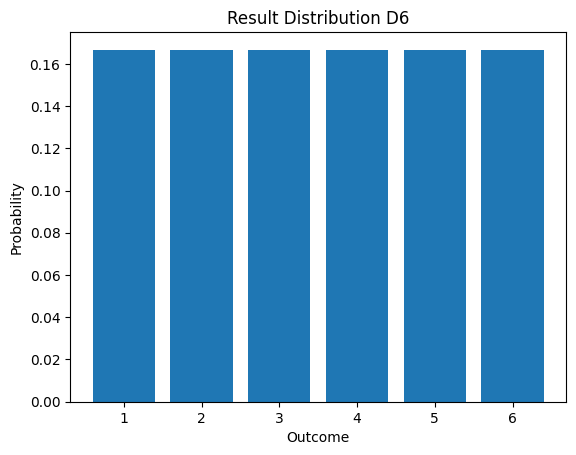

In [60]:

import matplotlib.pyplot as plt

sides = 6
die = make_die(sides)
outcomes = np.arange(1, sides+1)

plt.bar(outcomes, die) 
plt.xlabel('Outcome') 
plt.ylabel('Probability') 
plt.title('Result Distribution D6') 


plt.show()

If we roll two dice and add them up, there are 11 possible outcomes, 2 through
12, but they are not equally likely. To compute the distribution of the sum, we
have to enumerate the possible outcomes.

In [61]:
def add_dist(pmf1, pmf2): #Compute the distribution of a sum
    res = Pmf()
    for q1, p1 in pmf1.items():
        for q2, p2 in pmf2.items():
            q = q1 + q2
            p = p1 * p2
            if q in res:
                res[q] += p
            else:
                res[q] = p
    return res

- The parameters are Pmf objects representing distributions.
- The loops iterate though the quantities and probabilities in the Pmf objects. Each
time through the loop q gets the sum of a pair of quantities, and p gets the
probability of the pair. 
- Because the same sum might appear more than once, we
have to add up the total probability for each sum.

In [62]:
outcomes = np.arange(2, sides1 + sides2 + 1)

sides1 = 6
sides2 = 6

die1 = make_die(sides1)
die2 = make_die(sides2)

dice = add_dist(die1, die2) 

dice


,probs
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


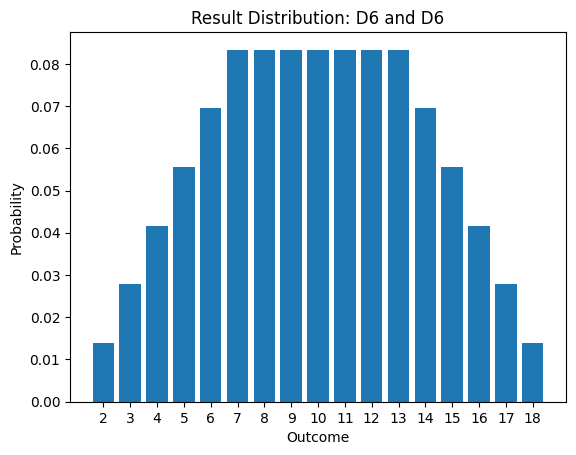

In [73]:
plt.bar(outcomes, dice) 
plt.xlabel('Outcome') 
plt.ylabel('Probability') 
plt.title('Result Distribution: D6 and D6') 
plt.xticks(outcomes)


plt.show()

In [68]:
outcomes = np.arange(2, sides1 + sides2 + 1)

sides1 = 12
sides2 = 6

die1 = make_die(sides1)
die2 = make_die(sides2)

dice = add_dist(die1, die2) 

dice

,probs
2,0.013889
3,0.027778
4,0.041667
5,0.055556
6,0.069444
7,0.083333
8,0.083333
9,0.083333
10,0.083333
11,0.083333


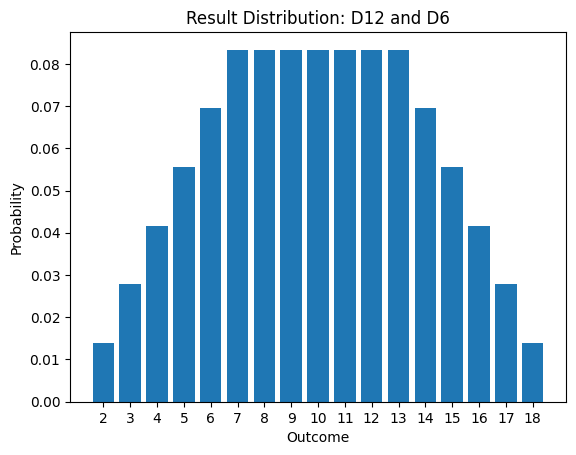

In [72]:
plt.bar(outcomes, dice) 
plt.xlabel('Outcome') 
plt.ylabel('Probability') 
plt.title('Result Distribution: D12 and D6') 

# Ensure x-ticks show every unit 
plt.xticks(outcomes)

plt.show()

Pmf provides add_dist, which does the same thing. You can call it as a
method, like this:


In [ ]:
twice = die.add_dist(die)

In [ ]:
def make_die(sides):
    outcomes = np.arange(1, sides+1)
    die = Pmf(1/sides, outcomes)
    return die

sides = 6

die = make_die(sides)


twice = die.add_dist(die)

twice

,probs
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


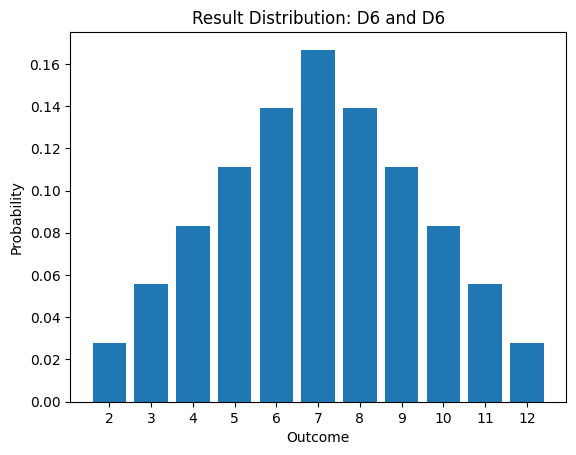

In [86]:
outcomes = np.arange(2, sides*2+1)

plt.bar(outcomes, twice) 
plt.xlabel('Outcome') 
plt.ylabel('Probability') 
plt.title('Result Distribution: D6 and D6') 

# Ensure x-ticks show every unit 
plt.xticks(outcomes)

plt.show()

Alternatively: 

In [ ]:
def make_die(sides):
    outcomes = np.arange(1, sides+1)
    die = Pmf(1/sides, outcomes)
    return die

sides1 = 12
sides2 = 6

die1 = make_die(sides1)
die2 = make_die(sides2)


twice = Pmf.add_dist(die1, die2)
twice

,probs
2,0.013889
3,0.027778
4,0.041667
5,0.055556
6,0.069444
7,0.083333
8,0.083333
9,0.083333
10,0.083333
11,0.083333


If we have a sequence of Pmf objects that represent dice, we can compute the
distribution of the sum like this:

In [90]:
def add_dist_seq(seq): # Compute Pmf of the sum of values from seq.
    total = seq[0]
    for other in seq[1:]:
        total = total.add_dist(other)
    return total

As an example, we can make a list of three dice like this:

In [89]:
dice = [die] * 3

And we can compute the distribution of their sum like this:

In [91]:
thrice = add_dist_seq(dice)

In [93]:
def make_die(sides):
    outcomes = np.arange(1, sides+1)
    die = Pmf(1/sides, outcomes)
    return die

sides = 6

die = make_die(sides)
dice = [die] * 3

thrice = add_dist_seq(dice)
thrice

,probs
3,0.004630
4,0.013889
5,0.027778
6,0.046296
7,0.069444
8,0.097222
9,0.115741
10,0.125000
11,0.125000
12,0.115741


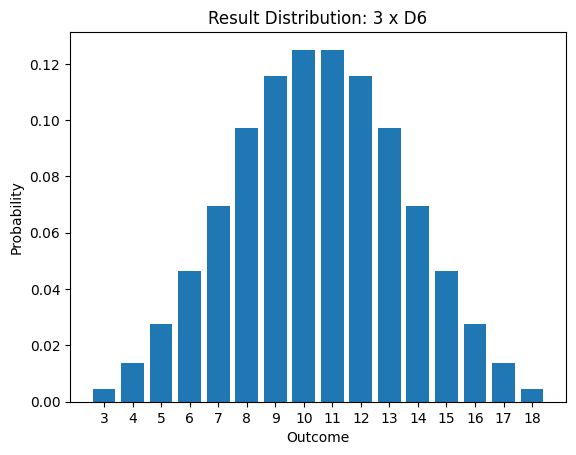

In [94]:
outcomes = np.arange(3, sides*3+1)

plt.bar(outcomes, thrice) 
plt.xlabel('Outcome') 
plt.ylabel('Probability') 
plt.title('Result Distribution: 3 x D6') 

# Ensure x-ticks show every unit 
plt.xticks(outcomes)

plt.show()

In summary, 
- The distribution of a single die is uniform from 1 to 6.
- The sum of two dice has a triangle distribution between 2 and 12.
- The sum of three dice has a bell-shaped distribution between 3 and 18.

This example demonstrates __the Central Limit Theorem__, which says
that the distribution of a sum converges on a bell-shaped normal distribution, at
least under some conditions.